# Introduction to Beta-Binomial Distribution

Welcome back! So far we have discussed the remarkable prior-likelihood-posterior paradigm about Bayesian concepts, probability distributions and visualization techniques that makes probability distribution well-known to audience.

The following series of lectures will dive into the discussion of mesmerizing probability distributions, with a special focus on their characteristics, what specific problems each distribution handles and what scenarios are considered suitable to specify each prior distribution. To recap, in Bayesian modeling, we'll typically take in some prior knowledge and model the data that we collect to update our belief. Each time when a new data comes in, we can iteratively cumulate our knowledge through taking in the result from previous iterations as prior and the new data together, just resembling a lifelong learner who ardently learns new things to become more and more knowledgeable. In this lecture, we'll focus on the Beta-binomial distribution family. We will explore the prior and posterior distributions when the data is related to the Beta-binomial distributions.

## Bernoulli, Binomial and Beta Distribution Concepts

Before defining binomial and beta distribution we'll first look at Bernoulli events. It's an event for which the probability of occurrence is p and the probability of the event not occurring is 1-p. So obviously speaking, a Bernoulli event has only two possible outcomes which can be viewed as **success or failure**, **yes or no** and sometimes **heads or tails**. Both the beta distribution and binomial distribution are extending the binary experiment from Bernoulli distribution into multiple experimental trials, all of which contains only success and failure as possible outcomes.

(Concept, might be skipped)
As seen from that, a binomial variable is a two-valued variable, the number of experiments (usually denoted as n) and the probability of success (usually denoted as p), hence it's called binomial. The linkage of binomial distribution and Bernoulli distribution is that Binomial distribution models the total number of successes in ‘n’ independent and repeated Bernoulli trials. The distribution has a number of important characteristics. 
* The most obvious characteristic is that it is **discrete** - the only possible outcomes are integer values starting from 0 to total number of attempts 
* The probabilities of the binomial variable taking any possible outcomes sum up to 1. This is called the **probabilistic** property which makes binomial distribution a valid distribution. In fact, it is important to remember that any valid distribution should have the total probability sums up to 1.
* Finally, if the probability of success is 0.5, the binomial distribution is **symmetric**. Otherwise, if the probability of success is greater than or smaller than 0.5, the binomial distribution is **assymmetric**.


Cool! A beta distribution is described by two parameters: alpha and beta. While the expression of beta
distribution involves special mathematical functions, the high-level interpretation of beta distribution is
closely related to success or failure, just like the Bernoulli and binomial distributions. So beta distribution can be understood as representing a **distribution of probabilities**. It represents all the possible values of a probability when we don't necessarily know what that probability is. Let's look at a sport analytics example that we use the Beta-Binomial distribution for analysis.

Anyone who follows baseball games may have heard of **batting averages**. It's the number of times a player gets a base hit, divided by the number of attempts the player goes up at bat. In other words, it's a performance metric between 0 and 1. According to a recent Reddit post, 0.270 is widely regarded as an acceptable betting average, while a player with a batting average above 0.300 is considered excellent.

Imagine you are a sport analyst and want to predict a particular baseball player's season-long batting average. If a player goes up to bat once and gets a single base hit, his batting average is purely 1, while if he strikes out, then his batting average is briefly 0, so you might argue that if we predict batting average with player's performance so far, we'll probably get a poor estimate at the onset of a season! How about the case if you have several data points? Well, you might still see a player who gets a lucky streak with base hits making his batting average equals to 1, or an miserable streak making his batting average ends up 0, neither of which seems to provide reasonable information of how a player will bat that season.

Before move on further analysis, ask yourself when a player's first few at-bat are strikeouts, why does no one predict that he'll never get a hit all season long? It is because we have our **prior expectations**. For example, we know that in the MLB history, most of the time the batting averages over a season hovered somewhere between 0.220 and 0.360, with just a few extreme exceptions on either side. So when a player gets a few strikeouts in a row at the first few games in a season, we'll expect that he'll end a season with batting average worse than average, but rarely would we believe that he won't get a hit unless he gets an injury at the very first few games.

Since the batting average embodies a series of successful hits and unsuccessful strikes, the best way to represent prior expectations (we call a prior) is with the Beta distribution. It's saying, before we've seen the player going up at bat, what we roughly expect his season-long batting average will be. Let's do some coding.

<AxesSubplot:ylabel='Density'>

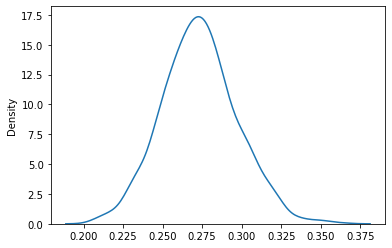

In [ ]:
# To model the prior distribution of a player's season-long batting average, we can import the stats module in the scipy library.
import scipy.stats as stats
# Suppose that we expect the player's season-long batting average will be around 0.27 (an average player), but allow the uncertainty
# that the probability could locate between 0.22 and 0.35. This can be approximated with a Beta distribution with 90 in the first parameter
# and 240 in the second parameter. We'll take 1000 prior samples to make a distribution.
batting_average = stats.beta.rvs(90, 240, size = 1000)

# Let's now import the seaborn visualization package
import seaborn as sns
# and make a kernel density plot to show the prior distribution of batting average for this particular player.
sns.kdeplot(batting_average)

# Cool! The domain of the beta distribution is actually from 0 to 1, just like a probability. By specifying 90 on the first parameter
# and 240 on the second parameter, the probability density of batting average peaks at around 0.27, and the distribution almost entirely 
# lies within 0.2 and 0.375, which we know we're on the right track.

<AxesSubplot:ylabel='Density'>

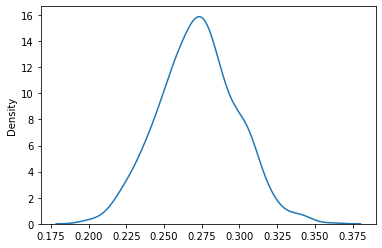

In [ ]:
# Imagine you went to a MLB game and the player got a single hit. Now his record for the season becomes "1 hit, 1 at bat", with perfect batting average.
# We can update our probabilities by adding the number of hit to the first parameter and adding the number of strike (failure) to the second parameter 
# of the beta distribution.
# In this case, we define the new batting average be a Beta distribution with 90 plus 1 hits and 240 plus 0 misses.
new_batting_average = stats.beta.rvs(90+1, 240, size = 1000)

# Let's visualize the new distribution using the sns.kdeplot function.
sns.kdeplot(new_batting_average)
# Actually the probability distribution barely changed at all. That is, the change is invisible to our eyes. What does it tell us about?
# It tells that one hit doesn't make much changes considering a season-long performance, and that's reasonable. However, if more hits and strikes
# are observed over the course of the season, we expect the curve will progressively shift to accommodate the new evidence because we then have
# stronger proof about the player's performance. So let's check this out!

<AxesSubplot:ylabel='Density'>

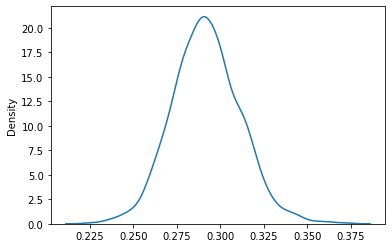

In [ ]:
# Let's say at the middle of the season the player has made 130 base hits out of 375 attempts (in fact, a crazy performance). Then, the new Beta 
# distribution will become Beta(90 + 130 hits, 240 + (375 - 130) misses). So the number of strikes is just the total attempts subtracted by the hits.
# Cool now let's define the mid-season batting average estimate by the beta distribution with successes in the first parameter, and failures in the 
# second parameter.
mid_batting_average = stats.beta.rvs(90 + 130, 240 + 245, size = 1000)
# and visualize the distribution using the kdeplot.
sns.kdeplot(new_batting_average)
# Notice that now the curve is both shifted to the right with higher batting average than it used to be, and thinner, meaning the estimate becomes 
# more precise as we have more information about the player's performance, which is interesting to know.

In this lecture, we have modeled a baseball problem using the Beta and binomial distributions. Theoretically Beta and binomial distributions are closed because both of them have good capacity of modelling the **probability distribution of probability**, a weird technical term but I hope you'll understand as you go through more lectures in this course. We concluded that the more observation we have on the model, the final distribution will shift more towards the probability given in the data and exhibit less variance, and the prior effect would diminish over time. At the end of the day, you'll use these concepts and code for online commerce, user experience research and more sport analytics problems. Stay tuned and I'll see you in the next video!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d164461f-c4b7-4df2-b711-3a9e5e978d4a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>